In [2]:
import numpy as np
from numpy import *
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [3]:
def read_data():
    f = open('diabetes.csv', 'r')
    lines = f.readlines()
    data = []
    lines = lines[1:]
    for line in lines:
        line = line.strip()
        parts = line.split(',')
        parts = [float(x) for x in parts]
        data.append(parts)
    data = np.array(data)
    data_x = data[:, :-1]
    data_y = data[:, -1]
    return data_x, data_y

data_x, data_y = read_data()
print(data_x.shape, data_y.shape)

(442, 10) (442,)


In [4]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)
print(x_train.shape, y_train.shape)
print(f"Original data range: min = {x_train.min():.1f}, max = {x_train.max():.1f}")

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
print(f"Scaled data range: min = {x_train_scaled.min():.2f}, max = {x_train_scaled.max():.2f}")

(353, 10) (353,)
Original data range: min = 1.0, max = 301.0
Scaled data range: min = -2.89, max = 4.20


In [8]:

ridge = Ridge(alpha=1.0)

ridge.fit(x_train_scaled,y_train)

y_pred = ridge.predict(x_test_scaled)

In [11]:

mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 2892.014565750171


NameError: name 'predictions' is not defined

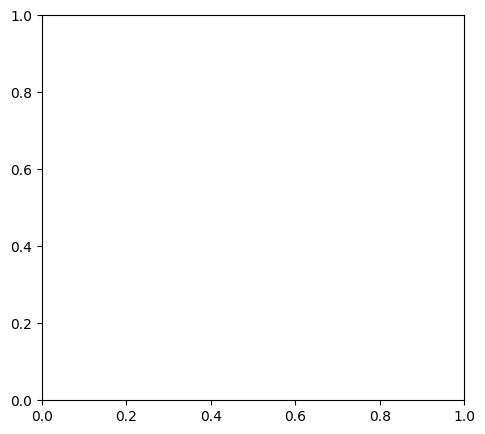

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, predictions, alpha=0.7, color='steelblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Actual')
plt.grid(True, linestyle='--', alpha=0.5)

# 2. Residuals Plot
residuals = y_test - predictions
plt.subplot(1, 2, 2)
plt.scatter(predictions, residuals, alpha=0.7, color='darkorange')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residuals vs Predicted')
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# 可选：打印一些误差指标
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {np.sqrt(mse):.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")